In [1]:
%matplotlib inline

In [2]:
import numpy as np
import skimage.io as io
import dicom
import matplotlib.cm as cm
import os

In [3]:
DATADIR = "/home/jovyan/DATA/Images"


In [4]:
img = dicom.read_file(os.path.join(DATADIR, "PE", "Ser_000006","IM-0124-0140.dcm"))
print(img)
aimg = img.pixel_array+img.RescaleIntercept

(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0008) Image Type                          CS: ['ORIGINAL', 'PRIMARY', 'AXIAL']
(0008, 0012) Instance Creation Date              DA: '20080103'
(0008, 0013) Instance Creation Time              TM: '2357'
(0008, 0016) SOP Class UID                       UI: CT Image Storage
(0008, 0018) SOP Instance UID                    UI: 1.2.840.113619.2.55.3.2047482327.789.1199355784.820.140
(0008, 0020) Study Date                          DA: '20080103'
(0008, 0021) Series Date                         DA: '20080103'
(0008, 0022) Acquisition Date                    DA: '20080103'
(0008, 0023) Content Date                        DA: '20080103'
(0008, 0030) Study Time                          TM: '2357'
(0008, 0031) Series Time                         TM: '2357'
(0008, 0032) Acquisition Time                    TM: '2357'
(0008, 0033) Content Time                        TM: '2357'
(0008, 0050) Accession Number                    

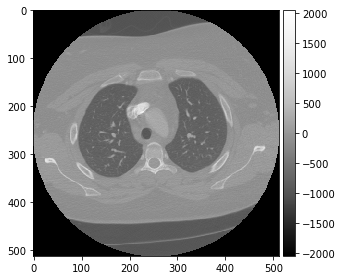

In [5]:
io.imshow(aimg,cmap=cm.Greys_r)

|Substance|	HU|
|:---------|---:|
|Air	|−1000|
|Lung	|−500|
|Fat	|−100 to −50|
|Water	|0|
|CSF	|15|
|Kidney	|30|
|Blood	|+30 to +45|
|Muscle	|+10 to +40|
|Grey matter	|+37 to +45|
|White matter	|+20 to +30|
|Liver	|+40 to +60|
|Soft Tissue, Contrast|	+100 to +300|
|Bone	|+700 (cancellous bone) to +3000 (dense bone)|

[From wikipedia](https://en.wikipedia.org/wiki/Hounsfield_scale)

#### Use the numpy ``where`` function|method to create masks of
* air
* soft tissue
* bone

In [6]:
help(np.where)

Help on built-in function where in module numpy.core.multiarray:

where(...)
    where(condition, [x, y])
    
    Return elements, either from `x` or `y`, depending on `condition`.
    
    If only `condition` is given, return ``condition.nonzero()``.
    
    Parameters
    ----------
    condition : array_like, bool
        When True, yield `x`, otherwise yield `y`.
    x, y : array_like, optional
        Values from which to choose. `x` and `y` need to have the same
        shape as `condition`.
    
    Returns
    -------
    out : ndarray or tuple of ndarrays
        If both `x` and `y` are specified, the output array contains
        elements of `x` where `condition` is True, and elements from
        `y` elsewhere.
    
        If only `condition` is given, return the tuple
        ``condition.nonzero()``, the indices where `condition` is True.
    
    See Also
    --------
    nonzero, choose
    
    Notes
    -----
    If `x` and `y` are given and input arrays are 1-D, `wh

In [10]:
io.imshow(np.where(-800 >= aimg >=-1200, 1, 0),cmap=cm.Greys_r)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()